In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction/Sample_Submission.csv
/kaggle/input/loan-approval-prediction/Training Dataset.csv
/kaggle/input/loan-approval-prediction/Test Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction/Training Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

EDA

<Axes: ylabel='count'>

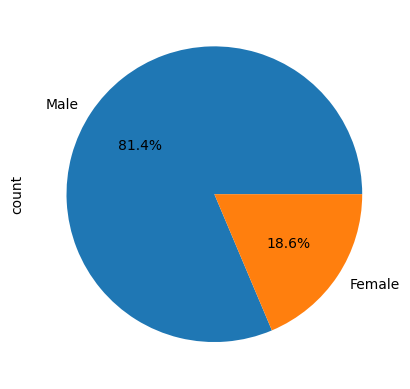

In [6]:
# analysing gender column
df['Gender'].value_counts().plot(kind='pie', autopct="%1.1f%%")

In [7]:
# gender vs loan_status
df.groupby('Gender')['Loan_Status'].value_counts().plot

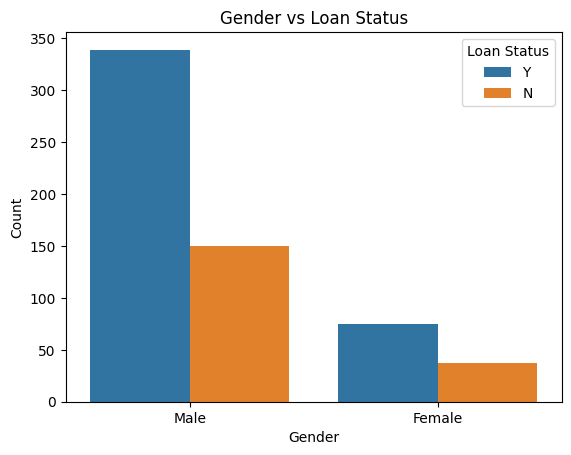

In [8]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

# Customize the plot
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [9]:
# percentage of male & female in approved loans
approved_loans = df[df['Loan_Status']=='Y']
total_approved = len(approved_loans)
total_males = len(df[df['Gender']=='Male'])
total_females = len(df[df['Gender']=='Female'])
approved_males = len(approved_loans[approved_loans['Gender']=='Male'])
approved_females = len(approved_loans[approved_loans['Gender']=='Female'])

print(f'Percentage of male with approved loans: {approved_males/total_males}')
print(f'Percentage of female with approved loans: {approved_females/total_females}')
print(f'Male loans approved: {approved_males/total_approved}')
print(f'Female loans approved: {approved_females/total_approved}')

Percentage of male with approved loans: 0.6932515337423313
Percentage of female with approved loans: 0.6696428571428571
Male loans approved: 0.8033175355450237
Female loans approved: 0.17772511848341233


<Axes: ylabel='count'>

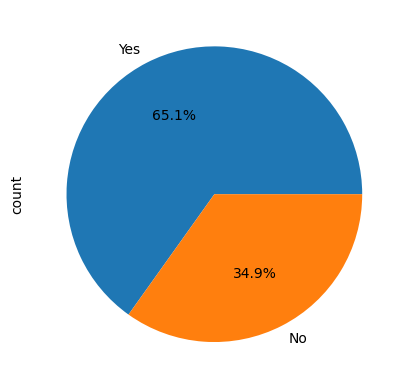

In [10]:
# analysing married column
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [11]:
# married vs loan_status
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: count, dtype: int64

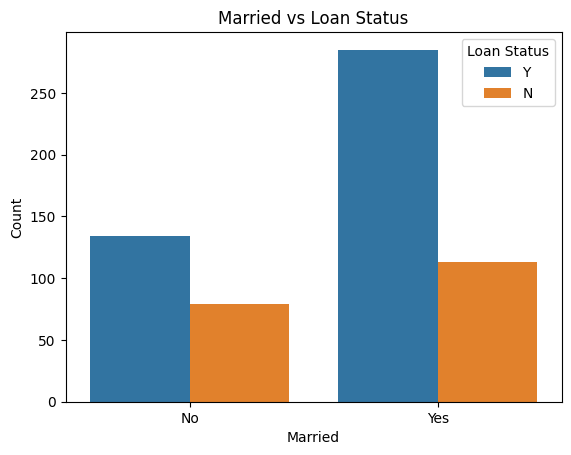

In [12]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

# Customize the plot
plt.title('Married vs Loan Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [13]:
# Filter the dataframe for approved loans
approved_loans = df[df['Loan_Status'] == 'Y']

# Calculate the total number of approved loans
total_approved = len(approved_loans)

# Calculate the number of approved loans for married and unmarried applicants
unmarried_approved = approved_loans[approved_loans['Married'] == 'No']
married_approved = approved_loans[approved_loans['Married'] == 'Yes']

# Calculate the percentages
percent_married_approved = (len(married_approved) / total_approved) * 100
percent_unmarried_approved = (len(unmarried_approved) / total_approved) * 100

# Calculate the number of approved loans for married males and females
married_males_approved = len(married_approved[married_approved['Gender'] == 'Male'])
married_females_approved = len(married_approved[married_approved['Gender'] == 'Female'])

# Calculate the total number of approved loans for males and females
approved_males = len(approved_loans[approved_loans['Gender'] == 'Male'])
approved_females = len(approved_loans[approved_loans['Gender'] == 'Female'])

# Calculate the percentages for married males and females
percent_married_males_approved = (married_males_approved / approved_males) * 100
percent_married_females_approved = (married_females_approved / approved_females) * 100

# Print the results
print(f'Percentage of married approved loans: {percent_married_approved:.2f}%')
print(f'Percentage of unmarried approved loans: {percent_unmarried_approved:.2f}%')
print(f'Percentage of married males with approved loans: {percent_married_males_approved:.2f}%')
print(f'Percentage of married females with approved loans: {percent_married_females_approved:.2f}%')


Percentage of married approved loans: 67.54%
Percentage of unmarried approved loans: 31.75%
Percentage of married males with approved loans: 75.52%
Percentage of married females with approved loans: 30.67%


<Axes: ylabel='count'>

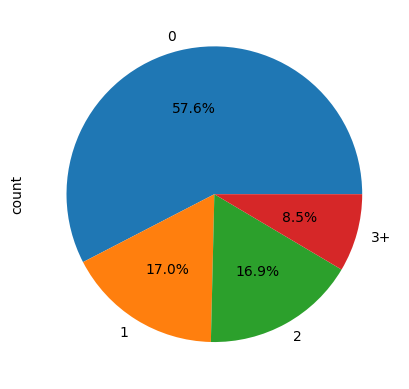

In [14]:
# analysing dependents column
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [15]:
# dependents vs loan_status
# Calculate the counts of loan statuses grouped by dependents
dependents_loan_status_counts = df.groupby('Dependents')['Loan_Status'].value_counts()

# Convert the counts to a percentage
dependents_loan_status_percentage = dependents_loan_status_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Display the percentage
print(dependents_loan_status_percentage)

Dependents  Dependents  Loan_Status
0           0           Y              68.985507
                        N              31.014493
1           1           Y              64.705882
                        N              35.294118
2           2           Y              75.247525
                        N              24.752475
3+          3+          Y              64.705882
                        N              35.294118
Name: count, dtype: float64


<Axes: ylabel='count'>

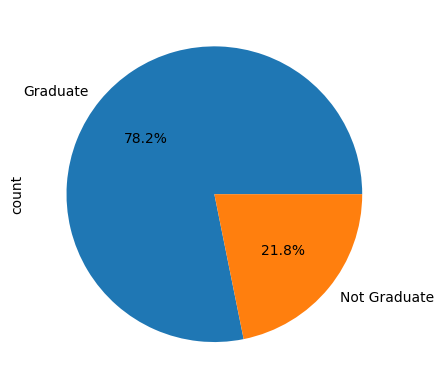

In [16]:
#analysing education column
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [17]:
# education vs loan_status
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: count, dtype: int64

In [18]:
# Count graduate and non-graduate approved loans
graduate_approved = (approved_loans['Education'] == 'Graduate').sum()
total_graduated = (df['Education']=='Graduate').sum()
total_not_graduated = (df['Education']=='Not Graduate').sum()
not_graduate_approved = (approved_loans['Education'] == 'Not Graduate').sum()

# Total approved loans
total_approved = len(approved_loans)

# Calculate percentages
print(f'Percentage of graduate loan approved: {graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of not graduate loan approved: {not_graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of graduate approval chances: {graduate_approved/total_graduated * 100:.2f}%')
print(f'Percentage of not graduate approval chances: {not_graduate_approved/total_not_graduated * 100:.2f}%')

Percentage of graduate loan approved: 80.57%
Percentage of not graduate loan approved: 19.43%
Percentage of graduate approval chances: 70.83%
Percentage of not graduate approval chances: 61.19%


<Axes: ylabel='count'>

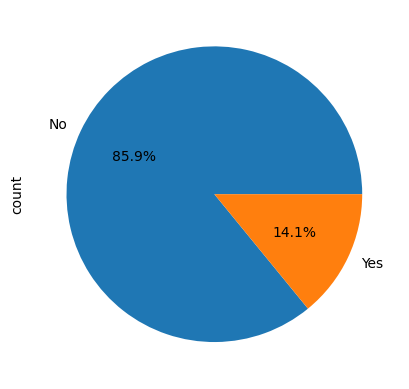

In [19]:
# analysing self employed column
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [20]:
# self employed vs loan_status
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: count, dtype: int64

In [21]:
self_employed_approved = (approved_loans['Self_Employed']=='Yes').sum()
not_self_employed_approved = (approved_loans['Self_Employed']=='No').sum()
self_employed = (df['Self_Employed']=='Yes').sum()
not_self_employed = (df['Self_Employed']=='No').sum()

print(f'Percentage of self employed approved loans: {self_employed_approved/total_approved*100:.2f}%')
print(f'Percentage of not self employed approved loans: {not_self_employed_approved/total_approved*100:.2f}%')
print(f'Self employed approval chances: {self_employed_approved/self_employed*100:.2f}%')
print(f'Not Self employed approval chances: {not_self_employed_approved/not_self_employed*100:.2f}%')

Percentage of self employed approved loans: 13.27%
Percentage of not self employed approved loans: 81.28%
Self employed approval chances: 68.29%
Not Self employed approval chances: 68.60%


In [22]:
# analysing ApplicantIncome column
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


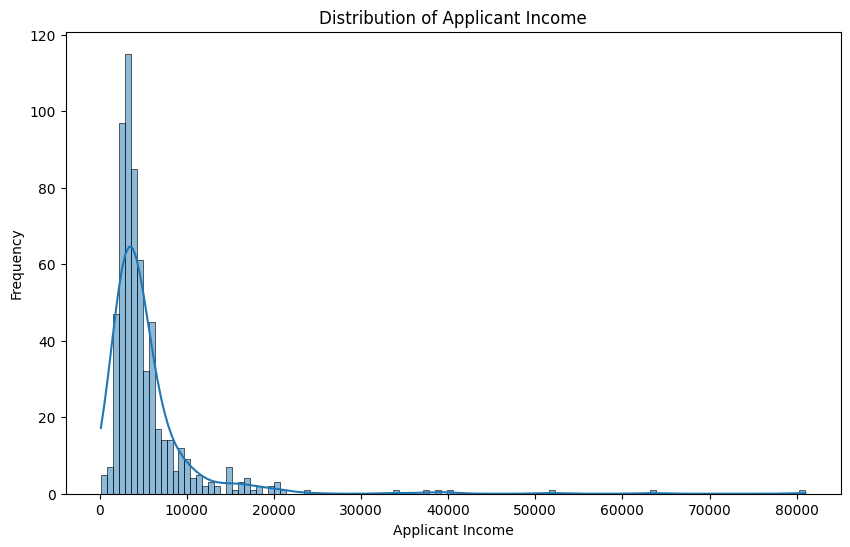

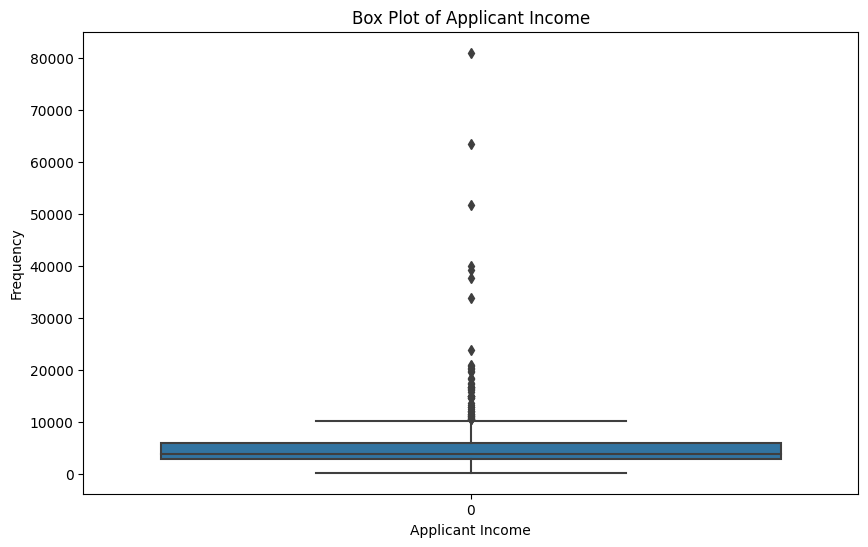

In [23]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [24]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q1 - Q3

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]
print(outliers)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [25]:
# drop loan_id column
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
# analysing coapplicant income
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


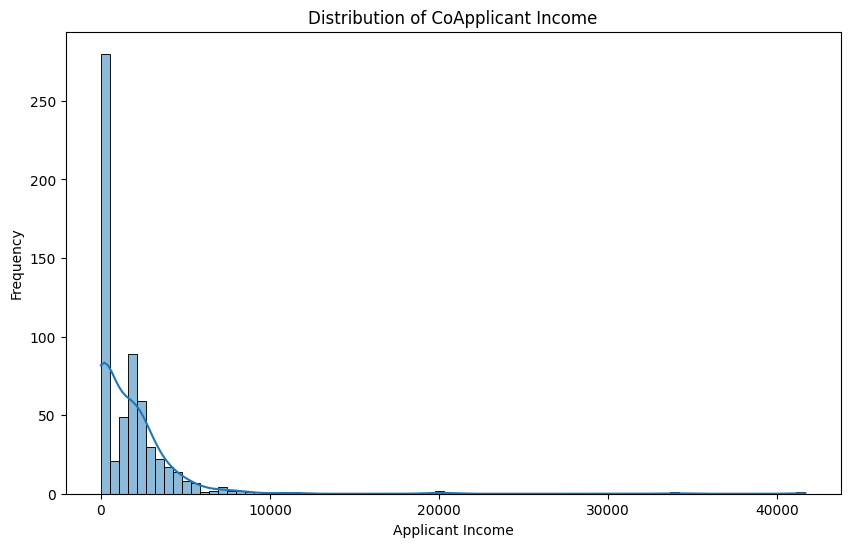

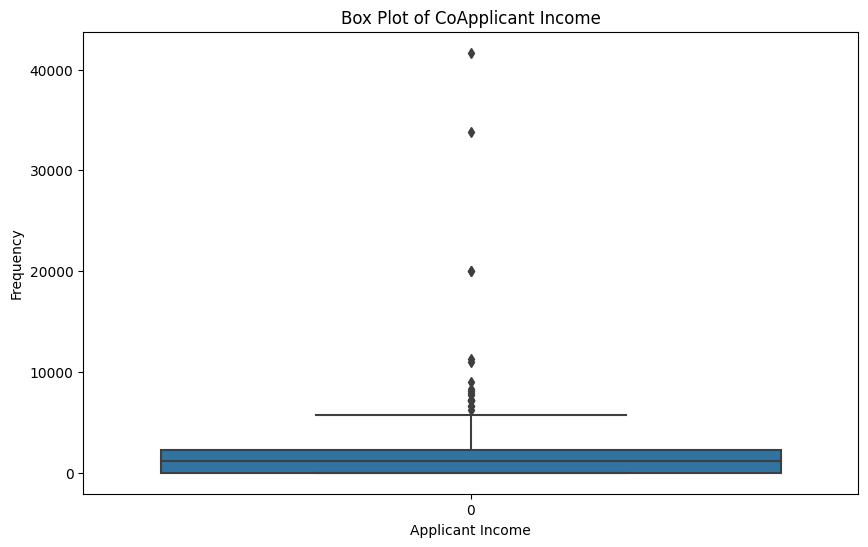

In [27]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Distribution of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['CoapplicantIncome'])
plt.title('Box Plot of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [28]:
# analysing loan amount
# Fill missing values in LoanAmount with the median value
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

/tmp/ipykernel_24/2193249299.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [29]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


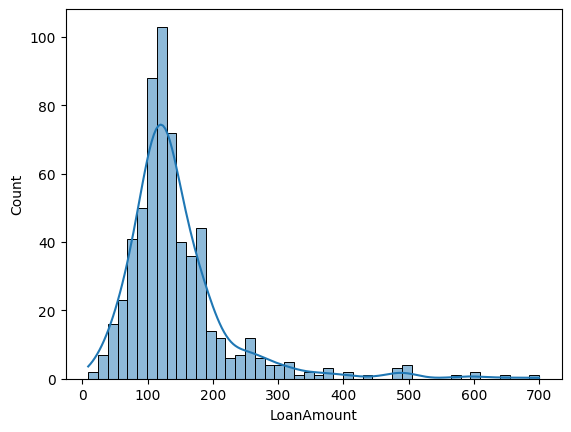

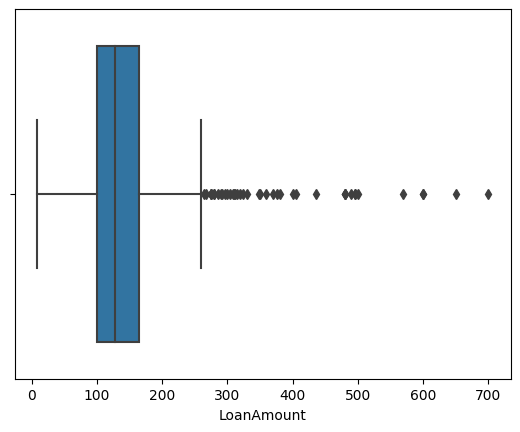

In [30]:
#Histplot of Loan Amount
sns.histplot(x=df['LoanAmount'], kde=True)
plt.show()

sns.boxplot(x=df['LoanAmount'])
plt.show()

In [31]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

/tmp/ipykernel_24/1787917455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)


In [32]:
df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

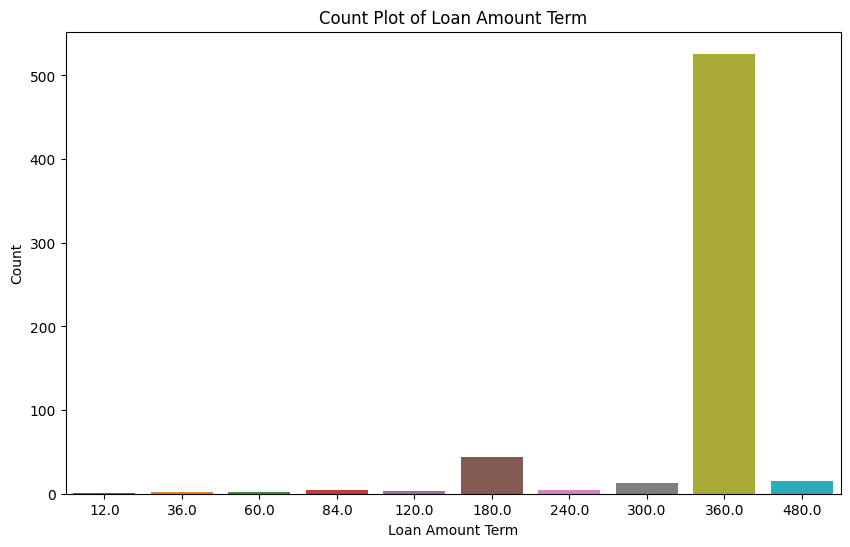

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', data=df)
plt.title('Count Plot of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()

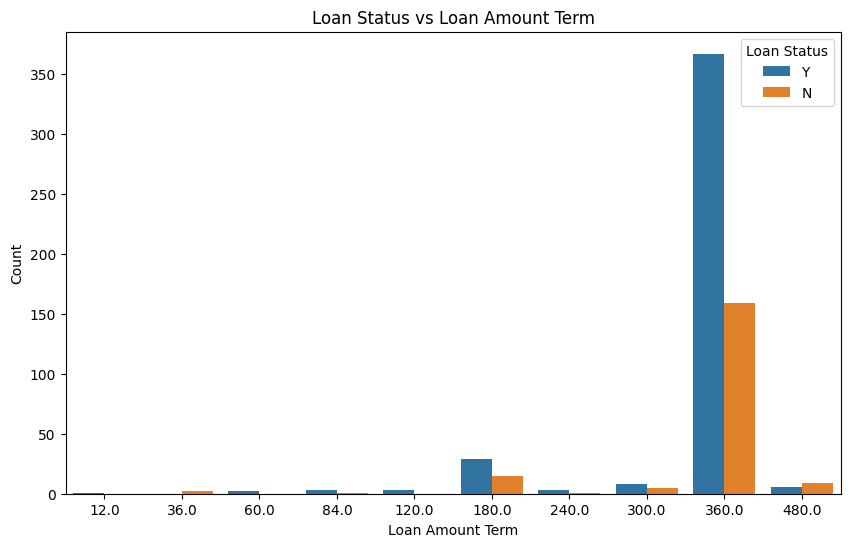

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)
plt.title('Loan Status vs Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [35]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [36]:
df['Credit_History'].fillna(1.0, inplace=True)

/tmp/ipykernel_24/858526279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(1.0, inplace=True)


In [37]:
# credit history vs loan status
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              415
                N              110
Name: count, dtype: int64

In [38]:
# Filter approved loans
approved_loans = df[df['Loan_Status'] == 'Y']

# Calculate the counts for Credit_History
credit_history_1 = (df['Credit_History'] == 1.0).sum()
credit_history_0 = (df['Credit_History'] == 0.0).sum()

# Calculate the counts for approved loans with respective Credit_History
credit_1_approved = (approved_loans['Credit_History'] == 1.0).sum()
credit_0_approved = (approved_loans['Credit_History'] == 0.0).sum()

# Print the chances of loan approval
print(f'Loan approval chances with credit history: {credit_1_approved / credit_history_1 * 100:.2f}%')
print(f'Loan approval chances without credit history: {credit_0_approved / credit_history_0 * 100:.2f}%')

Loan approval chances with credit history: 79.05%
Loan approval chances without credit history: 7.87%


In [39]:
# analysing property area column
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [40]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

In [41]:
rural = (df['Property_Area']=='Rural').sum()
semiurban = (df['Property_Area']=='Semiurban').sum()
urban = (df['Property_Area']=='Urban').sum()

rural_approved = (approved_loans['Property_Area']=='Rural').sum()
semiurban_approved = (approved_loans['Property_Area']=='Semiurban').sum()
urban_approved = (approved_loans['Property_Area']=='Urban').sum()

print(f'Percentage of rural approved: {rural_approved/rural*100:.2f}%')
print(f'Percentage of semiurban approved: {semiurban_approved/semiurban*100:.2f}%')
print(f'Percentage of rural approved: {urban_approved/urban*100:.2f}%')

Percentage of rural approved: 61.45%
Percentage of semiurban approved: 76.82%
Percentage of rural approved: 65.84%


In [42]:
# correlation matrix
# Selecting numeric columns for correlation calculation
from sklearn.preprocessing import LabelEncoder
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

# Display encoded DataFrame
print("\nEncoded DataFrame:")
print(df.head())


Encoded DataFrame:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  


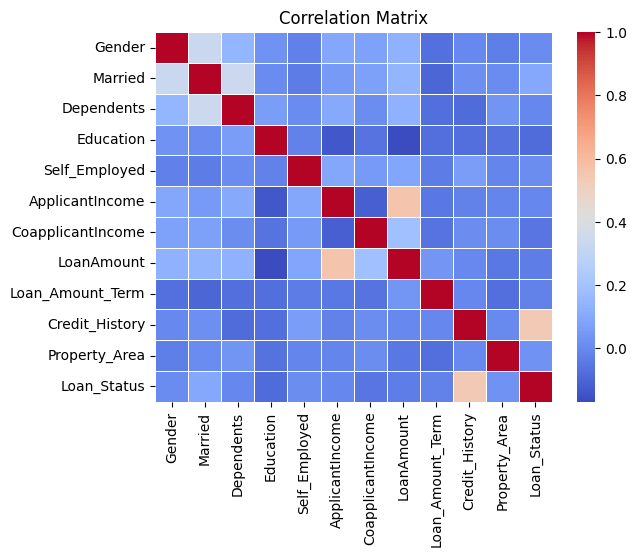

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [43]:
corr_mat = df.corr()
sns.heatmap(corr_mat, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(10,8))

Modelling

In [44]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [45]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# do scaling of numerical data

In [47]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_ypred = rfc_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Evaluation
print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))


Random Forest Classifier:
Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Confusion Matrix:
[[18 25]
 [ 5 75]]


In [49]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
lg_ypred = lg_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Logistic Regression Evaluation
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lg_ypred)}')
print("Classification Report:")
print(classification_report(y_test, lg_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_ypred))

Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]


In [51]:
# using xgboost
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)

In [52]:
# Xgboost Evaluation
print("xgboost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))

xgboost:
Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123

Confusion Matrix:
[[21 22]
 [ 8 72]]


In [53]:
from sklearn.preprocessing import StandardScaler

# Scale/normalize the data
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [54]:
# now apply all the modelling after scaling
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_ypred = rfc_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Evaluation
print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))

# logistic regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
lg_ypred = lg_model.predict(X_test)

# Logistic Regression Evaluation
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lg_ypred)}')
print("Classification Report:")
print(classification_report(y_test, lg_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_ypred))

# using xgboost
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)

# Xgboost Evaluation
print("xgboost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))


Random Forest Classifier:
Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
[[18 25]
 [ 3 77]]
Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


xgboost:
Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123

Confusion Matrix:
[[21 22]
 [ 8 72]]


In [55]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; 

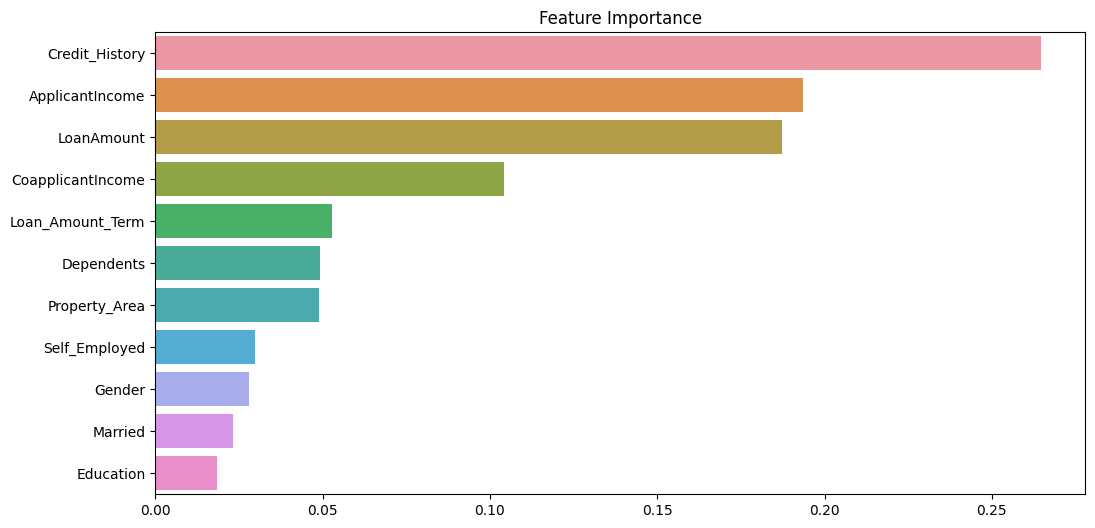

In [56]:
# Feature importance for Random Forest
importances = rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.show()

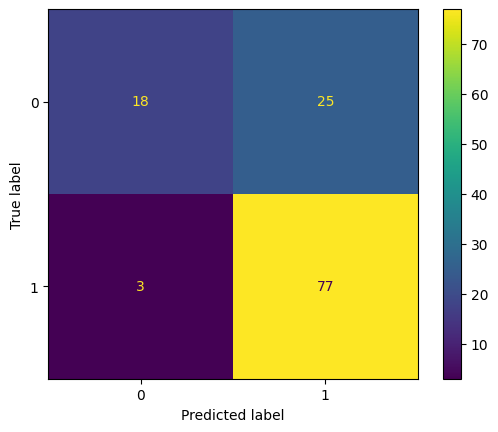

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rfc_model,X_test,y_test)

In [58]:
test_data = pd.read_csv('/kaggle/input/loan-approval-prediction/Test Dataset.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
# Preprocess the test data similar to the training data
test_data['Dependents'].replace('3+', 3, inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(), inplace=True)

# Encode categorical variables
test_data = pd.get_dummies(test_data)

# Ensure the same order of columns as the training data
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X.columns]

/tmp/ipykernel_24/376268359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Dependents'].replace('3+', 3, inplace=True)
/tmp/ipykernel_24/376268359.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [60]:
# Scale the test data
test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.transform(
    test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)

In [61]:
# Make predictions
test_predictions = best_rf.predict(test_data)

test = pd.read_csv('/kaggle/input/loan-approval-prediction/Test Dataset.csv')

# Prepare the submission file
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_predictions
})

# Convert numerical predictions to categorical ('Y' or 'N')
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Display the submission file
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [62]:
print(test.shape)
print(submission.shape)

(367, 12)
(367, 2)
